In [1]:
import matplotlib.pyplot as plt
import numpy as np
from src.copula_integration import equilibrium_solve, func_mx, func_y, acop
import pandas as pd
from src.wage_integrals import mass_wage_sector, equilibrium_xs, beta_part
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

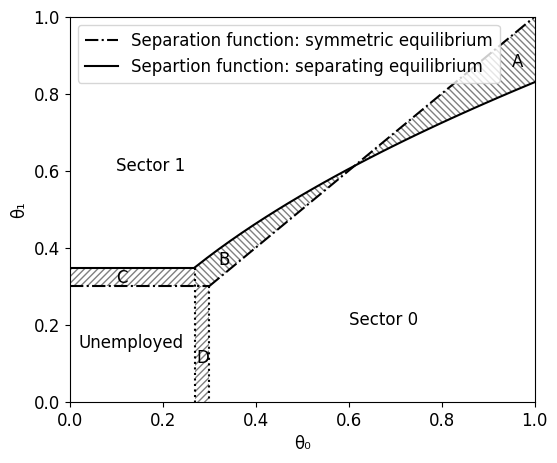

In [2]:
# Plot describing equilibria for different values of the correlation parameter and AMH copula
d = np.arange(0.3, 1.05, 0.025)
dd = np.arange(0.27, 1.05, 0.025)
ddd = np.arange(0.27, 0.31, 0.01)
dddd = np.arange(0, 0.271, 0.01)
ddddd = np.arange(0.27, 0.31, 0.01)
fig, ax = plt.subplots(figsize=(6, 5))


for item in ([ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)

def f1(x):
    return x
def f2(x):
    return x**(0.5)-0.17

vecfunc1 = np.vectorize(f1)
ax.plot(d,vecfunc1(d), label='Separation function: symmetric equilibrium',linestyle='dashdot',color='black')

vecfunc2 = np.vectorize(f2)
ax.plot(dd,vecfunc2(dd), label='Separtion function: separating equilibrium',color='black')
plt.plot([0, 0.3], [0.3, 0.3], color='black',linestyle='dashdot')
plt.plot([0.3, 0.3], [0.3, 0],color='black', linestyle='dotted')
plt.plot([0, 0.27], [(0.3**(0.5)-0.2), (0.3**(0.5)-0.2)],color='black')
plt.plot([0.27, 0.27], [(0.3**(0.5)-0.2), 0],color='black', linestyle='dotted')
plt.text(0.02, 0.14, 'Unemployed', fontsize=12)
plt.text(0.1, 0.6, 'Sector 1', fontsize=12)
plt.text(0.6, 0.2, 'Sector 0', fontsize=12)
plt.text(0.95, 0.87, 'A', fontsize=12)
plt.text(0.32, 0.355, 'B', fontsize=12)
plt.text(0.1, 0.31, 'C', fontsize=12)
plt.text(0.2723, 0.1, 'D', fontsize=12)
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend(loc='upper left',prop={'size': 12})
plt.fill_between(d, f1(d), f2(d), where=f1(d)>=f2(d), interpolate=True,color="none", hatch="\\\\\\\\\\", edgecolor="grey", linewidth=0.0,alpha=1)
plt.fill_between(d, f1(d), f2(d), where=f1(d)<=f2(d), interpolate=True,color="none", hatch="\\\\\\\\\\", edgecolor="grey", linewidth=0.0,alpha=1)
plt.fill_between(ddd, 0.3, f2(ddd), where=0.27<=f2(ddd), interpolate=True,color="none", hatch="\\\\\\\\\\", edgecolor="grey", linewidth=0.0,alpha=1)
plt.fill_between(dddd, 0.3, 0.35, interpolate=True,color="none", hatch="/////", edgecolor="grey", linewidth=0.0,alpha=1)
plt.fill_between(ddddd, 0, 0.3, interpolate=True,color="none", hatch="/////", edgecolor="grey", linewidth=0.0,alpha=1)
plt.savefig('isf.pdf')

In [3]:
normd = 1
kappa = 0.5
xx = equilibrium_solve([0.45, 0.67, 0.1], kappa, normd)

In [4]:
normd = 1
kappa = 0.7
#newton_krylov(lambda k: func_x(k)-k,  [0])
xx2 = equilibrium_solve([0.4, 0.7, 0.15], kappa, normd)

In [8]:
out1 = pd.DataFrame([xx])
out2 = pd.DataFrame([xx2])
out1.to_pickle("eq1")
out2.to_pickle("eq2")  

In [3]:
xx = pd.read_pickle("eq1")
xx2 = pd.read_pickle("eq2")

In [4]:
#Check condition for comparative static result
normd = 1
kappa = 0.7
y = func_mx(xx.x[0][0],xx.x[0][1],xx.x[0][2], kappa, normd),
func_y(xx.x[0][0]/xx.x[0][1],xx.x[0][2], kappa, normd), func_y(y[0][0]/y[0][1],xx.x[0][2], kappa, normd)

((0.5000000000278255, 0.4999999999611757),
 (0.4411136460378532, 0.5588863539346323))

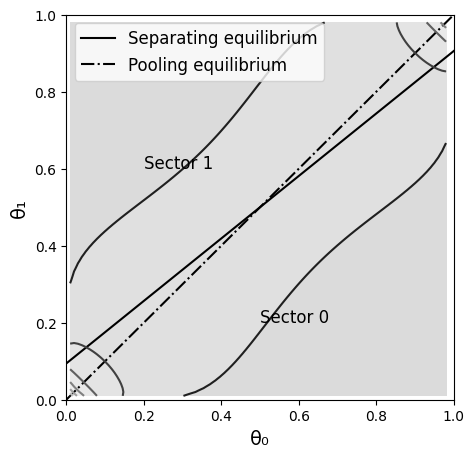

In [5]:
# Contour plot and equilibria distributions Gaussian copula ρ = 0.5
kappa = 0.5
k = xx.x[0][0]/xx.x[0][1]
m = xx.x[0][2]



fig, ax = plt.subplots(figsize=(5, 5))
d = np.arange(0, 1, 0.001)
vecfunc = np.vectorize(lambda x: (x-(1-k)/2)/k)
vecfunc2 = np.vectorize(lambda x: x)
x = np.arange(0.01,0.99,0.01)
y = np.arange(0.01,0.99,0.01)
X, Y = np.meshgrid(x,y)


zs = []
for i in np.arange(0.01,0.99,0.01):
    for j in np.arange(0.01,0.99,0.01):
        zs.append(acop(i,j,kappa,normd))
zs = np.array(zs)
Z = zs.reshape(X.shape)
ax.contourf(X, Y, Z, cmap=plt.cm.gray,alpha=0.15)



ax.plot(vecfunc(d),d,label='Separating equilibrium',color='black')
vecfunc2 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc2(d), label='Pooling equilibrium',linestyle='dashdot',color='black')
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend(loc='upper left',prop={'size': 12})
plt.text(0.2, 0.6, 'Sector 1', fontsize=12)
plt.text(0.5, 0.2, 'Sector 0', fontsize=12)
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)    
plt.contour(X,Y,Z)
plt.gray()
#plt.suptitle("Skill separation in competitive equilibria") 
plt.savefig('eqsepss05.pdf')

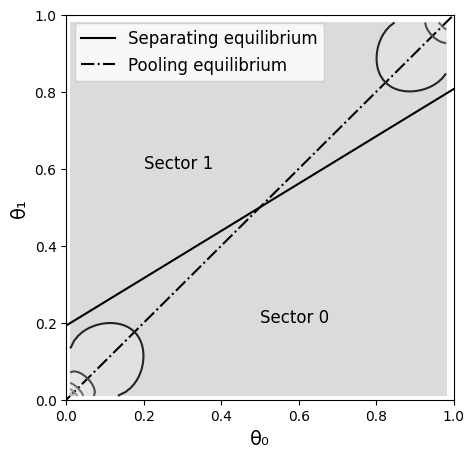

In [6]:
# Contour plot and equilibria distributions Gaussian copula ρ=0.7
kappa = 0.7
k = xx2.x[0][0]/xx2.x[0][1]
m = xx2.x[0][2]

fig, ax = plt.subplots(figsize=(5, 5))
d = np.arange(0, 1, 0.001)
vecfunc = np.vectorize(lambda x: (x-(1-k)/2)/k)
vecfunc2 = np.vectorize(lambda x: x)
x = np.arange(0.01,0.99,0.01)
y = np.arange(0.01,0.99,0.01)
X, Y = np.meshgrid(x,y)


zs = []
for i in np.arange(0.01,0.99,0.01):
    for j in np.arange(0.01,0.99,0.01):
        zs.append(acop(i,j,kappa,normd))
zs = np.array(zs)
Z = zs.reshape(X.shape)
ax.contourf(X, Y, Z, cmap=plt.cm.gray,alpha=0.15)



ax.plot(vecfunc(d),d,label='Separating equilibrium',color='black')
vecfunc2 = np.vectorize(lambda x: x)
ax.plot(d,vecfunc2(d), label='Pooling equilibrium',linestyle='dashdot',color='black')
ax.set_ylim([0, 1])
ax.set_xlim([0, 1])
ax.set_xlabel('θ0'.translate(subscript))
ax.set_ylabel('θ1'.translate(subscript))
ax.legend(loc='upper left',prop={'size': 12})
plt.text(0.2, 0.6, 'Sector 1', fontsize=12)
plt.text(0.5, 0.2, 'Sector 0', fontsize=12)
for item in ([ax.xaxis.label, ax.yaxis.label]):
    item.set_fontsize(14)    
plt.contour(X,Y,Z)
plt.gray()
#plt.suptitle("Skill separation in competitive equilibria") 
plt.savefig('eqsepss.pdf')

# Plotting wage distributions

In [ ]:
normd = 1
eqk = np.array([])
for i in [0,1,2]:
    if i==0:
        γ = 1
        kappa = 0.8
        σ= 1
    elif i==1:
        γ = 1
        kappa = 0.85
        σ= math.sqrt(x**2+0.8)
    elif i==2:
        γ = 1
        kappa = 0.85
        σ= 1
    eqk = np.append(eqk,equilibrium_solve([0.65,0.45,0.1]))
eqk
out1 = pd.DataFrame(eqk)
out1.to_pickle("eqks_csfinal")

In [ ]:
dff = pd.read_pickle("eqks_csfinal")
a=dff[0].apply(pd.Series)

In [7]:
#Plotting wage distributions
for i in [0,2]:
    if i == 0:
        kappa = 0.8
        σ = 1
        γ = 1
    elif i == 1:
        kappa = 0.85
        γ = 1
        σ = 1
        
    x_0, x_1, C = a[0:3].x[i]
    x = a[0:3].x[i][0:2]
    x_sym =equilibrium_xs(1,1,0)[0:2]
    
    d_low = np.arange(beta_part(x_0)+0.01, 2.5, 0.01)
    d_high = np.arange(C +beta_part(x_0)+0.01, 2.5, 0.01)
    d_med = np.arange(0.01+beta_part(x_sym[0]), 2.5, 0.01)
   
    low_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,0, kappa))(d_low)
    high_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,1, kappa))(d_high)
    med_wage = np.vectorize(lambda θ: mass_wage_sector(x_sym,θ,0,0, kappa))(d_med)

    fig, ax = plt.subplots()

    ax.plot(d_high,high_wage, label='Separating eq. high-type sector', color='black', linestyle='dotted')
    ax.plot(d_low,low_wage, label='Separating eq. low-type sector', color='black', linestyle='dashed')
    ax.plot(d_med,med_wage, label='Symmetric eq. single sector', color='black')

    plt.legend()
    #plt.title('Wage distributions in different eq')
    plt.xlabel('Wage')
    plt.ylabel('Density')
    plt.savefig('wd' + f'{str(i)}' +'final.pdf')    

NameError: name 'a' is not defined

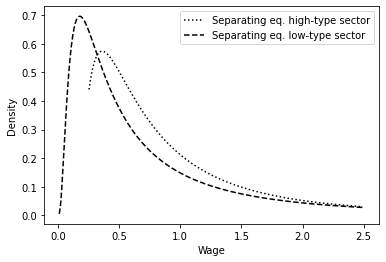

In [ ]:
#Plotting wage distributions asym
ab = fsolve(lambda x: (x*math.sqrt(0.8)+0.4)/math.sqrt(x**2+0.8)-0.85,  0.3)
x = ab[0]
normd = 1
β = 0
γ = 1
kappa = 0.85
σ = math.sqrt(x**2+0.8)

        
x_0, x_1, C = a[0:3].x[1]
x = a[0:3].x[1][0:2]
d_low = np.arange(beta_part(x_0)+0.01, 2.5, 0.01)
d_high = np.arange(C +beta_part(x_0)+0.01, 2.5, 0.01)
    

low_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,0))(d_low)
high_wage = np.vectorize(lambda θ: mass_wage_sector(x,θ,C,1))(d_high)
    
fig, ax = plt.subplots()

ax.plot(d_high,high_wage, label='Separating eq. high-type sector', color='black', linestyle='dotted')
ax.plot(d_low,low_wage, label='Separating eq. low-type sector', color='black', linestyle='dashed')


plt.legend()
#plt.title('Wage distributions in different eq')
plt.xlabel('Wage')
plt.ylabel('Density')
plt.savefig('wd1final.pdf')    

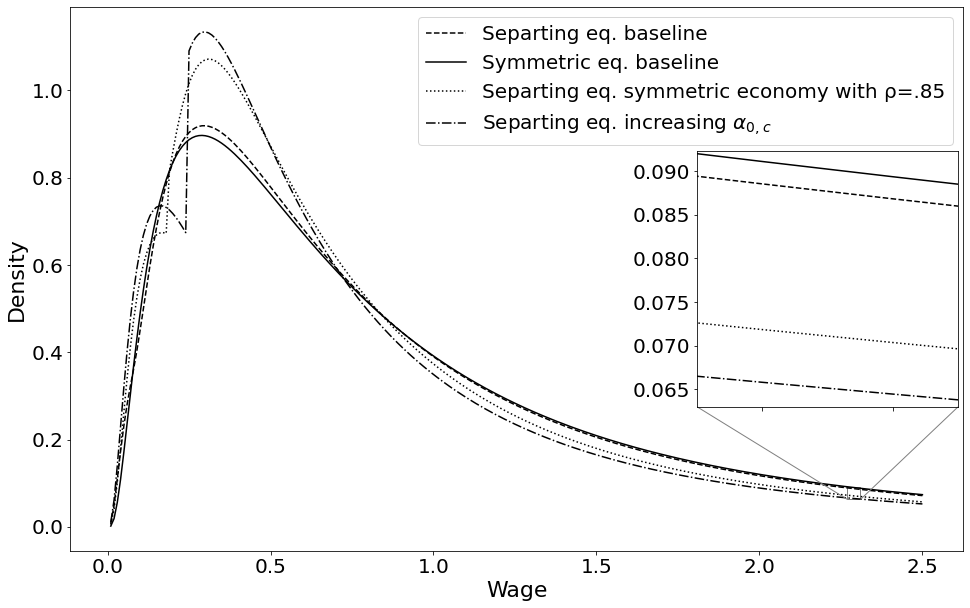

In [ ]:
import matplotlib

string =r'Separting eq. increasing $α_{0,c}$'
kappa = 0.8
γ = 1
normd = 1
σ = 1
x_0, x_1, C = a[0:3].x[0]
x = a[0:3].x[0][0:2]
x_sym =equilibrium_xs(1,1,0)[0:2]
d_low = np.arange(beta_part(x_0)+0.01, 2.5, 0.01)

sum_wage = np.vectorize(lambda θ: summer(x,θ,C,σ))(d_low)
med_wage = np.vectorize(lambda θ: mass_wage_sector(x_sym,θ,0,0))(d_low)
sum_med_wage = 2*med_wage

fig, ax = plt.subplots(figsize=(16, 10))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
ax.plot(d_low,sum_wage, label='Separting eq. baseline' ,color='black', linestyle='dashed')
ax.plot(d_low,sum_med_wage, label='Symmetric eq. baseline',color='black')

kappa = 0.85
x_0, x_1, C = a[0:3].x[2]
x = a[0:3].x[2][0:2]

sum_wage_2 = np.vectorize(lambda θ: summer(x,θ,C,σ))(d_low)


ax.plot(d_low,sum_wage_2, label='Separting eq. symmetric economy with ρ=.85',color='black', linestyle='dotted')

ab = fsolve(lambda x: (x*math.sqrt(0.8)+0.4)/math.sqrt(x**2+0.8)-0.85,  0.3)
x = ab[0]
σ = math.sqrt(x**2+0.8)
x_0, x_1, C = a[0:3].x[1]
x = a[0:3].x[1][0:2]

sum_wage_3 = np.vectorize(lambda θ: summer(x,θ,C,σ))(d_low)


ax.plot(d_low,sum_wage_3, label=string, color='black', linestyle='dashdot')


plt.legend(fontsize=20)
plt.xlabel('Wage', size=22)
plt.ylabel('Density', size=22)

axins = zoomed_inset_axes(ax, 20, loc=7)
axins.plot(d_low,sum_wage,color='black', linestyle='dashed')
axins.plot(d_low,sum_med_wage, color='black')
axins.plot(d_low,sum_wage_2, linestyle='dotted',color='black')
axins.plot(d_low,sum_wage_3, linestyle='dashdot',color='black')

# sub region of the original image
x1, x2, y1, y2 = 2.27, 2.31, 0.063, 0.0923
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)

plt.xticks(visible=False)
#plt.yticks(visible=False)
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")
#plt.title('Total wage distributions in different eq')

plt.savefig('twd2.pdf')